In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import os
import lab2_utils as utils

In [14]:
##########################################################
#  Defined constants used to load in the .txt EEG files  #
##########################################################

NUM_ROWS_TO_SKIP = 4  # header data in the .txt file
NUM_CHANNELS = 8  # number of EEG channels
EEG_CHANNEL_PREFIX = utils.NEW_EEG_CHANNEL_PREFIX  # label to help us identify columns with EEG data
SAMPLE_RATE = 250  # Sampling rate of data in Hz

DATA_DIR = "data"  # directory containing recording files to be loaded and plotted
TIMESTAMP_STR = "timestamp"  # name of column with recording timestamps

# Used to plot EEG channels in the same colors as shown on the
# OpenBCI GUI (and also matching the wire colors connected to
# each electrode). Keys are the EEG channel, values are the hex
# code for the corresponding color.
EEG_CHANNEL_COLORS = {
    "1": "#878787",  # gray
    "2": "#a670db",  # purple
    "3": "#697de0",  # blue
    "4": "#6be069",  # green
    "5": "#e6de4e",  # yellow
    "6": "#e6954e",  # orange
    "7": "#eb4444",  # red
    "8": "#703d1f",  # brown
}


###########################################################
#  Functions to load and plot EEG data                    #
###########################################################


def load_recording_file(fname):
    """Returns a pandas dataframe that consists of all the timeseries
    data, with associated column names, from an OpenBCI GUI recording file.
    The filename of the recording file is given by <fname>.

    fname: string representing the name of the recording file to load
    """
    file_path = os.path.join(DATA_DIR, fname)
    data_df = pd.read_csv(file_path, header = NUM_ROWS_TO_SKIP)

    utils.clean_eeg_dataframe(data_df)  # does some cleanup
    return data_df


def is_eeg(col_name):
    """ Returns True if the column given by <col_name> contains EEG data, and
    False otherwise.

    col_name: a string representing a column in the dataframe loaded using
    load_recording_file
    """
    return EEG_CHANNEL_PREFIX in col_name


def plot_eeg_data(data_df):
    """ Plots all EEG channel data found in the pandas dataframe
    <data_df>.

    data_df: a Pandas dataframe consisting of EEG data to be plot
    """
    # creates 8 rows and 1 column of subplots
    fig, ax = plt.subplots(
        NUM_CHANNELS, 1, sharex='all', figsize=(15, 15)
    )

    print('data_df.columns.values: {}'.format(data_df.columns.values))
    # timestamp column
    sampling_rate = 1/250 # in seconds
    
    # use sampling frequency (250Hz) to tspace the timestamp column arbitrarily
    data_df['timestamp'] = [i * sampling_rate for i in range(len(data_df))]
    data_df.set_index('timestamp')

    # iterates through columns in the dataframe
    channel_number = 0
    for col_name in data_df.columns.values:
        if is_eeg(col_name):
            # plot EEG channel 1 on the first subplot, and so on
            # omit the first 2 seconds- REMEMBER TO DO THIS FOR ALL SUBSEQUENT PLOTTING TOO
            ax[channel_number].plot(data_df[col_name][500:], color=EEG_CHANNEL_COLORS[str(channel_number+1)])
            channel_number += 1

    # Adding title, legends, and axes labels
    [ax[i].legend(loc="lower left", fontsize=18) for i in range(NUM_CHANNELS)]
    fig.suptitle("EEG data over time", fontsize=22)
    fig.subplots_adjust(top=0.95, bottom=0.05)
    plt.xlabel("Time (HH:MM:SS)", fontsize=20)
    plt.rcParams['text.usetex'] = True
    # fig.text(0.06, 0.5, 'Recorded Signal ($\\mu$V)', va='center', rotation='vertical', fontsize=20)
    plt.show()
    plt.rcParams['text.usetex'] = False

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

data_df.columns.values: ['sample index' 'eeg ch1' 'eeg ch2' 'eeg ch3' 'eeg ch4' 'eeg ch5'
 'eeg ch6' 'eeg ch7' 'eeg ch8' 'accel channel 0' 'accel channel 1'
 'accel channel 2' 'analog channel 0' 'analog channel 1'
 'analog channel 2' 'timestamp']


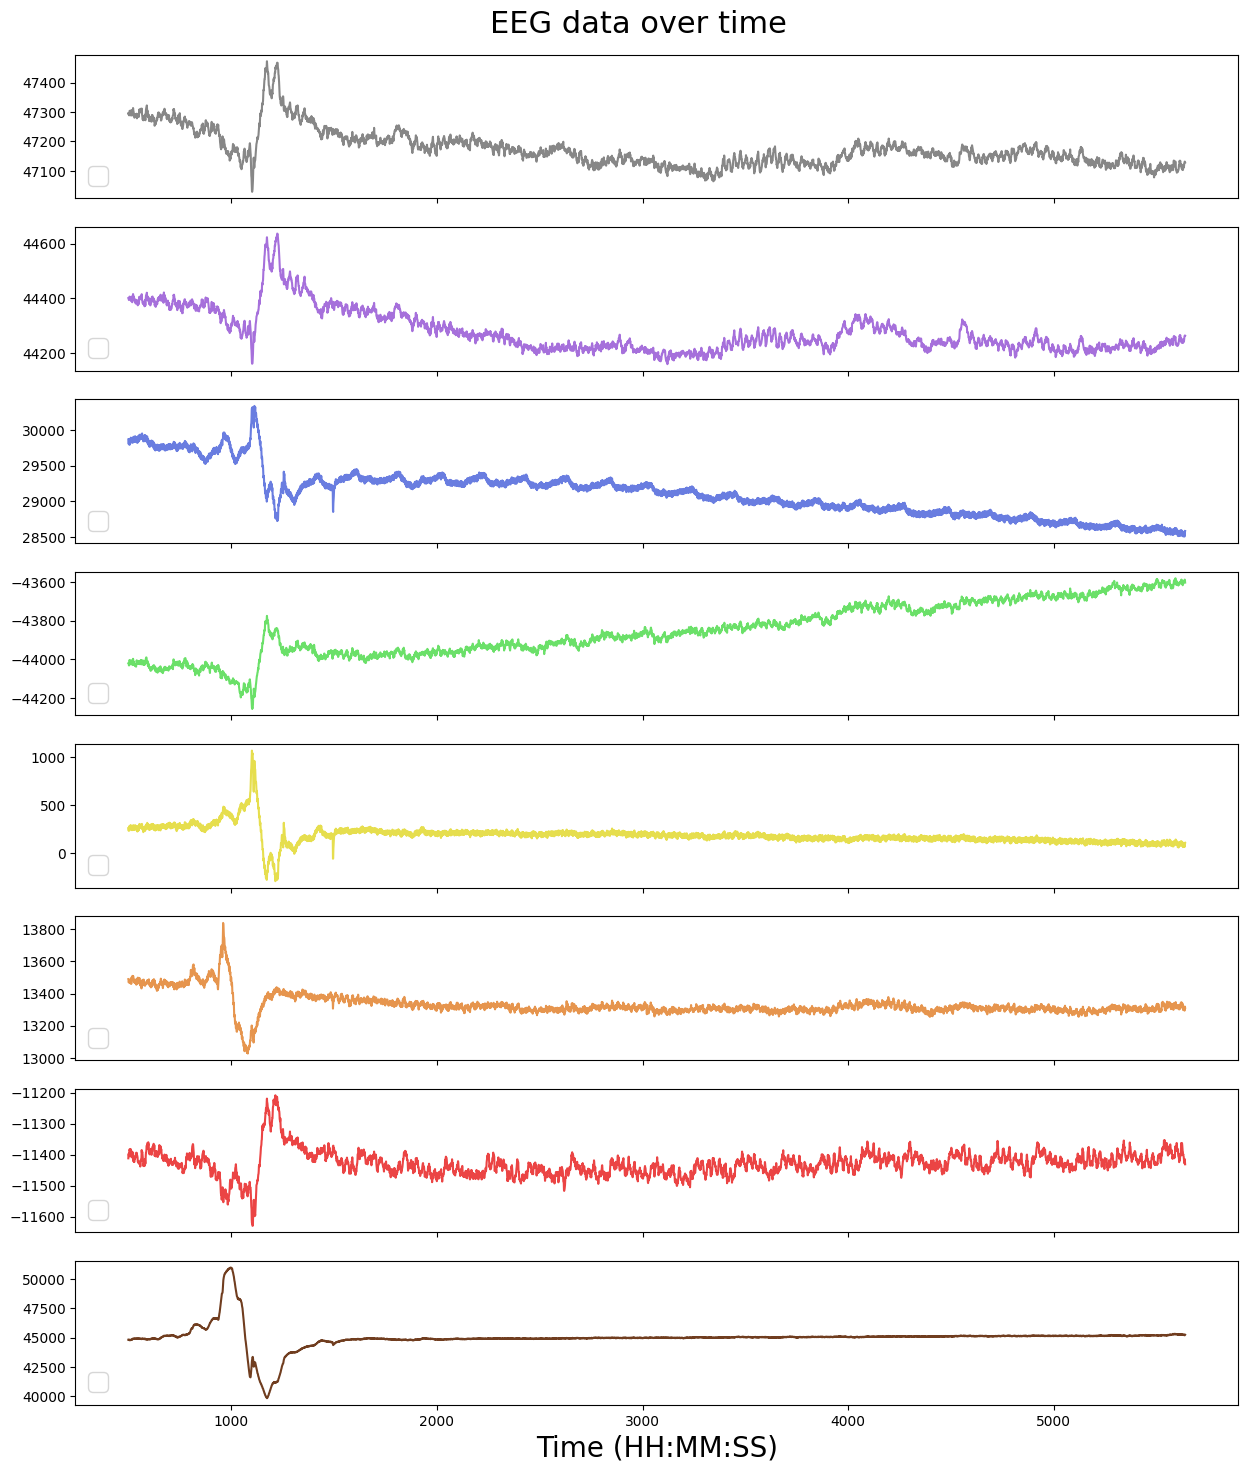

In [15]:
data_df = load_recording_file("Closed_1.txt")

pd.set_option('display.max_columns', None)

plot_eeg_data(data_df)